[View in Colaboratory](https://colab.research.google.com/github/LibbyFender/Learning/blob/master/project2_regression_Final.ipynb)

Welcome to one of two Kaggle challenges for Project 2! As part of a successful submission for Project 2, we will expect you to make at least one (and hopefully, multiple!) submissions towards this regression challenge.

<<<<<<<<<<<<<<<<<<<<<<------------------------------------>>>>>>>>>>>

In this challenge, you will use the well known Ames housing data to create a regression model that predicts the price of houses in Ames, IA. You should feel free to use any and all features that are present in this dataset..


Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. .

Id,SalePrice

train.csv -- this data contains all of the training data for your model. It is the same data found in the DSI-WEST-3 Regression Challenge so you may use the training set from either challenge's page for both.
Both target variables (SalePrice and Sale Condition) are removed from the test set!

<<<<<<<<<<<<<<<-------------------------->>>>>>>>>>>>>>>>>>>>>>>>>>>>>

test.csv -- this data contains the test data for your model. You will feed this data into your regression model (for this challenge) and into the classification model (for the DSI-WEST-3 Regression Challenge). It is the same dataset for both, so you may use either challenge's data to generate your predictions.

<<<<<<<<<<<<<<<--------   ---------------->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

sample_submission_class.csv -- An example of a correctly formatted submission for this challenge (with a random number provided as predictions for Sale Condition. Please ensure that your submission to Kaggle matches this format.

Codebook / Data Dictionary:

https://www.kaggle.com/c/dsi-west-3-project-2-classification-challenge
https://www.kaggle.com/c/dsi-west-3-project-2-regression-challenge      

8/16/18 update: This project was initially created in Jupyter notebook. I am playing with it now in a colab environment. Things are patchwork as I explore new ways to play with familiar data. Please don't judge, this code is academic in nature, and as such it does not follow a direct course.

# Get started

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [0]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy import stats
from scipy.stats import norm, skew
from IPython.display import display

In [0]:
from google.colab import files

In [10]:
uploaded = files.upload()

Saving testAmes.csv to testAmes.csv


In [11]:
ames = files.upload()

Saving trainAmes.csv to trainAmes.csv


In [15]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "testAmes.csv" with length 285886 bytes


In [17]:
uploaded

{'testAmes.csv': b'Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type\n2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,I

In [18]:
for fn in ames.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(ames[fn])))

User uploaded file "trainAmes.csv" with length 652432 bytes


In [19]:
ames

{'trainAmes.csv': b'Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice\r\n109,533352170,60,RL,,13517,Pav

Remember, I am not yet loaded into a dataframe. My CSV is now a dictionary. TrainAmes is my training data, while testAmes is my test data.

In [0]:
import io

In [33]:
#Load Training data
Ames = pd.read_csv(io.StringIO(ames['trainAmes.csv'].decode('utf-8')))

KeyError: ignored

In [0]:
#Load Test data
ames_test = pd.read_csv(io.StringIO(uploaded['testAmes.csv'].decode('utf-8')))

In [0]:
def SizeMatters(train, test):
    print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
    print("The test data size after dropping Id feature is : {} ".format(test.shape))

In [0]:
def find_redundant_features(Abbrev):
    redundant_home_features = []
    for i in ames.columns:
        if Abbrev in i:
            redundant_home_features.append(i)
    return(redundant_home_features)

In [0]:
def find_missing_feature(df):
    (df.isnull().sum()*100)/(len(df))#.sort_values(ascending=False)
    df_null = (df.isnull().sum()*100)/(len(df))#.sort_values(ascending=False)
    df_null = df_null.drop(df_null[df_null == 0].index).sort_values(ascending=False)
    return df_null.head(10)

In [0]:
def duplicat_ids(df):
    idsUnique = len(set(df.Id))
    idsTotal = df.shape[0]
    idsDupli = idsTotal - idsUnique
    print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

In [0]:
def Fill_None(df, column_name):
    df[column_name] = df[column_name].fillna('None')
    return df[column_name].isnull().sum()

In [0]:
def Fill_Zero(df, column_name):
    df[column_name] = df[column_name].fillna('0')
    return df[column_name].isnull().sum()

In [0]:
def Fill_Mode(df, column_name):
    df[column_name] = df[column_name].fillna(df[column_name].mode()[0])
    return df[column_name].isnull().sum()

In [0]:
def clean_column(df, Column_name):# replace_with):
    column_mean = df[Column_name].mean()
    df[Column_name].replace(to_replace=NaN, value=column_mean, inplace=True)
    print(df[Column_name].describe())

In [34]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


In [35]:
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


# I finished building my model before importing test set. I am attempting to patchwork it back in.

In [37]:
#check the numbers of samples and features--SalePrice, SaleCondition
print("The train data size before dropping Id feature is : {} ".format(ames.shape))
print("The test data size before dropping Id feature is : {} ".format(ames_test.shape))

The train data size before dropping Id feature is : (2051, 82) 
The test data size before dropping Id feature is : (879, 80) 


In [39]:
duplicat_ids(ames)

There are 0 duplicate IDs for 2051 total entries


In [0]:
#Save the 'Id' column
train_ID = ames['Id']
test_ID = ames_test['Id']

In [0]:
Ames = ames
Ames_Test = ames_test

In [0]:
Ames.drop("Id", axis = 1, inplace = True)
Ames_Test.drop("Id", axis = 1, inplace = True)




In [44]:
SizeMatters(Ames, Ames_Test)


The train data size after dropping Id feature is : (2051, 81) 
The test data size after dropping Id feature is : (879, 79) 


# Exploratory EDA

In [0]:
Ames.head(3)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000


In [0]:
Ames.shape

(2051, 81)

In [0]:
Ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2

In [0]:
(Ames.isnull().sum()*100)/(len(Ames))#.sort_values(ascending=False)
Ames_null = (Ames.isnull().sum()*100)/(len(Ames))#.sort_values(ascending=False)
Ames_null = Ames_null.drop(Ames_null[Ames_null == 0].index).sort_values(ascending=False)
Ames_null.head(10)

Pool QC          99.561190
Misc Feature     96.830814
Alley            93.174061
Fence            80.497318
Fireplace Qu     48.756704
Lot Frontage     16.089712
Garage Yr Blt     5.558264
Garage Cond       5.558264
Garage Qual       5.558264
Garage Finish     5.558264
dtype: float64

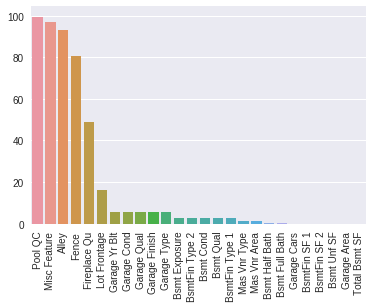

In [0]:
an = plt.subplots()
plt.xticks(rotation='90')
sns.barplot(Ames_null.index, Ames_null)

In [0]:
Ames.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


Ames.dropna(thresh=1500, axis=1, inplace=True) #drop only fields with 1500 or more null
Ames.isnull().sum()

Ames.shape #4 columns were dropped. #Pool data likely to overfit due to limited number of homes sold with pool

<<<<<<<<<<<<<<<<<--------------------Target Data-------------------->>>>>>>>>>>>>>>>>>>>>>>>>>>>>-------------<<<<<<<<<<<<<<<<<<<<<<<<<<
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict for this challenge.


In [0]:
Ames['SalePrice'].value_counts(dropna=False) #no null values

130000    25
140000    22
145000    20
135000    19
160000    16
128000    16
170000    16
155000    15
120000    15
190000    14
165000    13
147000    13
125000    13
200000    13
127000    12
173000    12
143000    12
105000    12
150000    12
185000    12
144000    11
119000    11
225000    11
139000    11
215000    11
132000    10
141000    10
127500    10
115000    10
180000    10
          ..
35000      1
116900     1
215200     1
159895     1
202900     1
194700     1
293000     1
200825     1
195400     1
174190     1
149700     1
375000     1
199000     1
139400     1
293200     1
264500     1
153900     1
332200     1
57625      1
223500     1
112900     1
178400     1
155891     1
221000     1
137450     1
289000     1
129250     1
76000      1
206900     1
169985     1
Name: SalePrice, dtype: int64

I Zero'd in on Garage data, for no particular reason other than I see Ames as an area that takes garages seriously. I suppose we'll see about that.<br> <br>
The structure of the following code is rooted in the idea that I might write a few functions that could iterate through the data, and produce a meaningfully cleaned pandas dataframe. First, it would create a list of features with a high potential for overlap, such as garage, or bath. The function would then delete, overwrite or combine the columns. Another option would be to find the feature within the like group that has the strongest correlation to the sale price. That 1 feature would become the lone, remaining feature from the like group. In code, I refered to this as the find_redundant_features. I also will repurpose my clean_questions function from the humor lab.

In [0]:
garage_error=[]
for c in Ames['Garage Yr Blt']:
    if c > 2011:
        garage_error.append(c)
        print(garage_error)

[2207.0]


In [0]:
garage_error_test=[]
for c in Ames_Test['Garage Yr Blt']:
    if c > 2011:
        garage_error_test.append(c)
        print(garage_error_test)

#I investigated Misc feature in an earlier version, before dropping columns.
#Ames['Misc Feature'].unique()
Ames['Misc Feature'].value_counts(dropna = False)

In [0]:
Ames['Garage Cars'].value_counts(dropna = False)
#I suspect I would be fine with Ames.dropna(subset=['Garage Cars'])

 2.0    1136
 1.0     524
 3.0     263
 0.0     113
 4.0      13
NaN        1
 5.0       1
Name: Garage Cars, dtype: int64

In [0]:
Ames['Garage Cars'].replace(to_replace='NaN', value=0.0, inplace=True)
Ames['Garage Cars'].value_counts(dropna = False)

2.0    1136
1.0     524
3.0     263
0.0     114
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

In [0]:
Ames_Test['Garage Cars'].replace(to_replace='NaN', value=0.0, inplace=True)
Ames_Test['Garage Cars'].value_counts(dropna = False)

2.0    467
1.0    254
3.0    111
0.0     44
4.0      3
Name: Garage Cars, dtype: int64

In [0]:
#Ames['Garage Cars'].notnull()
garage_features = Ames.iloc[:, 58:65]
garage_features.info()
#make list of garage features. run corr, make mask so that just DF of garages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 7 columns):
Garage Type      1938 non-null object
Garage Yr Blt    1937 non-null float64
Garage Finish    1937 non-null object
Garage Cars      2051 non-null float64
Garage Area      2050 non-null float64
Garage Qual      1937 non-null object
Garage Cond      1937 non-null object
dtypes: float64(3), object(4)
memory usage: 112.2+ KB


In [0]:
garage_object = list(garage_features.select_dtypes(include=['object']).columns)
garage_object

['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

In [0]:
garage_features.corr() #this provides little insight, also, only includes float 64 data

,Garage Yr Blt,Garage Cars,Garage Area
Garage Yr Blt,1.000000,0.579623,0.552069
Garage Cars,0.579623,1.000000,0.893180
Garage Area,0.552069,0.893180,1.000000


In [0]:
garage_features.describe() #Also, only includes float data

,Garage Yr Blt,Garage Cars,Garage Area
count,1937.000000,2051.000000,2050.000000
mean,1978.707796,1.775719,473.671707
std,25.441094,0.765357,215.934561
min,1895.000000,0.000000,0.000000
25%,1961.000000,1.000000,319.000000
50%,1980.000000,2.000000,480.000000
75%,2002.000000,2.000000,576.000000
max,2207.000000,5.000000,1418.000000


In [0]:
Ames['Garage Yr Blt'].describe()

count    1937.000000
mean     1978.707796
std        25.441094
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2207.000000
Name: Garage Yr Blt, dtype: float64

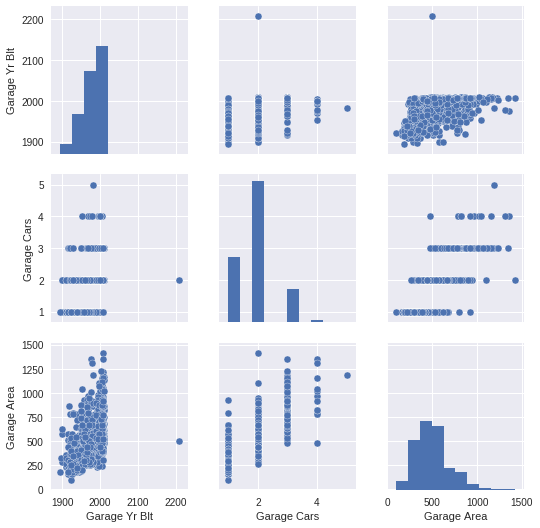

In [0]:
sns.pairplot(garage_features.dropna())

In [0]:
#Ames['SalePrice'].unique()
Ames = Ames.drop(Ames[Ames['Garage Yr Blt'] > 2011].index)
Ames['Garage Yr Blt'].describe()


count    1936.000000
mean     1978.589876
std        24.912564
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: Garage Yr Blt, dtype: float64

In [0]:
Ames_Test = Ames_Test.drop(Ames_Test[Ames_Test['Garage Yr Blt'] > 2011].index)
Ames_Test['Garage Yr Blt'].describe()

count     834.000000
mean     1976.796163
std        25.695683
min      1900.000000
25%      1960.000000
50%      1978.000000
75%      2001.000000
max      2010.000000
Name: Garage Yr Blt, dtype: float64

In [0]:
SizeMatters(Ames, Ames_Test) #I got lucky here. Test set did not drop any rows.


The train data size after dropping Id feature is : (2050, 81) 
The test data size after dropping Id feature is : (879, 79) 


In [0]:
def clean_column(df, column_name):   
    column_mean = df[Column_name].mean()
    df[Column_name].replace(to_replace=NaN, value=column_mean, inplace=True)
    print(df[Column_name].describe())

In [0]:
Ames['Gr Liv Area'].unique()
#Ames.columns

array([1479, 2122, 1057, ..., 2668, 1913, 1804])

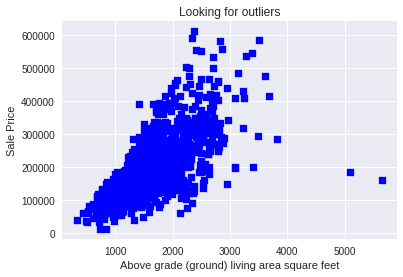

In [0]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(Ames['Gr Liv Area'], Ames['SalePrice'], c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("Above grade (ground) living area square feet")
plt.ylabel("Sale Price")
plt.show()

In [0]:
find_redundant_features('Porch')

['Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch']

OpenPorchSF: Open porch area in square feet<br>
EnclosedPorch: Enclosed porch area in square feet<br>
3SsnPorch: Three season porch area in square feet<br>
ScreenPorch: Screen porch area in square feet<br>

In [0]:
Ames['3Ssn Porch'].dtype

dtype('int64')

In [0]:
find_redundant_features('Bath')

['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath']

In [0]:
Ames['Half Bath'].unique()

array([1, 0, 2])

In [0]:
find_redundant_features('Garage')

['Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond']

In [0]:
find_redundant_features('Gr')

['Gr Liv Area', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd']

In [0]:
find_redundant_features('Bed')

['Bedroom AbvGr']

In [0]:
find_redundant_features('Kitchen')

['Kitchen AbvGr', 'Kitchen Qual']

In [0]:
Ames = Ames[Ames['Gr Liv Area'] < 4000]
#Ames = Ames[Ames['SalePrice']<30000].index
Ames.shape

(2048, 81)

In [0]:
Ames_Test['Gr Liv Area'].max()

4676

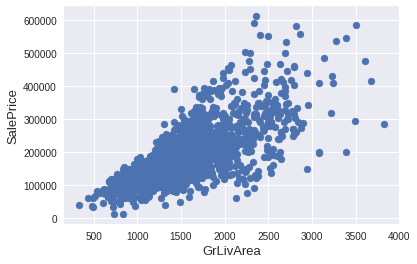

In [0]:
fig, ax = plt.subplots()
ax.scatter(Ames['Gr Liv Area'], Ames['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [0]:
find_redundant_features('Roof')

['Roof Style', 'Roof Matl']

In [0]:
find_redundant_features('Lot')

['Lot Frontage', 'Lot Area', 'Lot Shape', 'Lot Config']

In [0]:
find_redundant_features('Bath')

['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath']

In [0]:
Bsmt_features = find_redundant_features('Bsmt')
Bsmt_features

['Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath']

In [0]:
Ames['Bsmt Qual'].value_counts(dropna=False)

TA     887
Gd     863
Ex     182
Fa      60
NaN     55
Po       1
Name: Bsmt Qual, dtype: int64

# Log-transformation of Right-skewed Data

https://stats.stackexchange.com/questions/107610/what-is-the-reason-the-log-transformation-is-used-with-right-skewed-distribution


 mu = 181437.11 and sigma = 79273.22



Text(0.5,1,'SalePrice distribution')

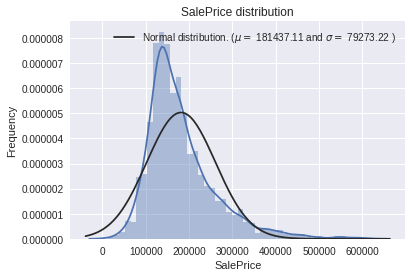

In [0]:
sns.distplot(Ames['SalePrice'], fit=norm);
(mu, sigma) = norm.fit(Ames['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma)) # I only want 2 decimal places.
#https://stackoverflow.com/questions/30692225/find-best-fit-parameters-using-python
plt.legend(['Normal distribution. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

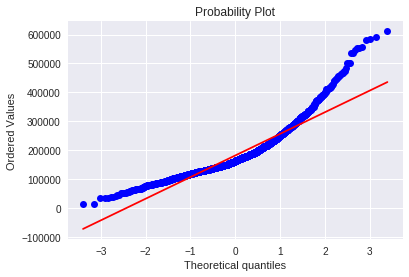

In [0]:
fig = plt.figure()
res = stats.probplot(Ames['SalePrice'], plot=plt)
plt.show()


 mu = 181437.11 and sigma = 79273.22



Text(0.5,1,'SalePrice distribution')

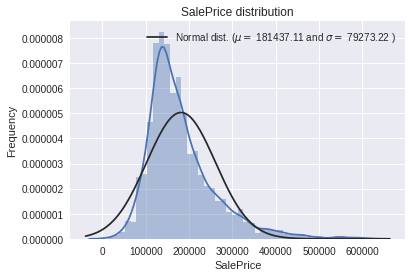

In [0]:
sns.distplot(Ames['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(Ames['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


 mu = 181437.11 and sigma = 79273.22



Text(0.5,1,'SalePrice distribution')

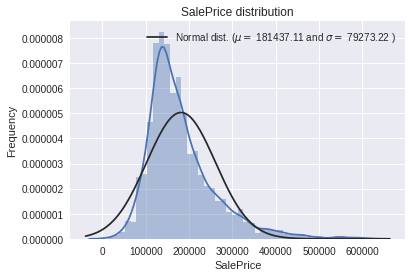

In [0]:
#Ames['SalePrice'] = np.log1p(Ames['SalePrice'])
sns.distplot(Ames['SalePrice'], fit = norm)
(mu, sigma) = norm.fit(Ames['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

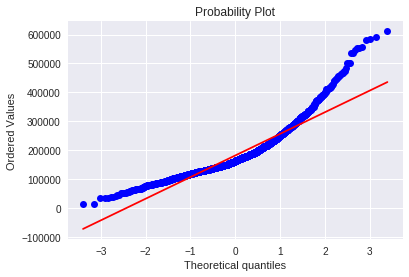

In [0]:
fig = plt.figure()
res = stats.probplot(Ames['SalePrice'], plot=plt)
plt.show()

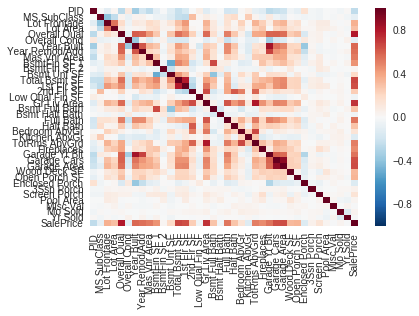

In [0]:
corr_Ames = Ames.corr()
plt.subplots()
sns.heatmap(corr_Ames)

I'm good with distribution up to this point.

# <<<<--------Meaningful EDA------------->>>>>>>
I spent significant time playing with the data, and didn't really find a meaningful way to decide how to reduce intercorrelation without deleting everything that was inconvenient.
For quantitative columns, we can add averages or reduce Nan to 0. This seems promising as much of the Nan data seems to be that the home did not have that feature. For example, pool data. Many of those NaN answers relate to the fact that those homes were sold without a pool.<br>
It also seems that, for the purpose of a linear regression model, a single bath and a half bath would be essentially the same. I will run my model with like columns combined.<br>
<br><br>
I failed to combine test and train data, and am adding it in bandaid style. Up to this point, I believe I introuced 1 opportunity for error, related to garage data. I also recognize that using the same DF name for my test data as my full df (train and sample combined) is problematic, but I do not want to find and replace with a new name for each instance. I'm working with what I got.
<br><br>


In [0]:
ntrain_size = Ames.shape[0]
ntest_size = Ames_Test.shape[0]
y_train = Ames.SalePrice.values

In [0]:
print("Ames(Train) size is : ", ntrain_size, "- Ames_Test size is :", ntest_size)

Ames(Train) size is :  2048 - Ames_Test size is : 879


In [0]:
Ames = pd.concat((Ames, Ames_Test)).reset_index(drop=True)
Ames.drop(['SalePrice'], axis=1, inplace=True)
print("Ames size is : {}".format(Ames.shape))

Ames size is : (2927, 80)


In [0]:
for col in ('Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond'):
    Ames[col] = Ames[col].fillna('None')
for col in ('Garage Yr Blt', 'Garage Area', 'Garage Cars'):
    Ames[col] = Ames[col].fillna(0)

# Combine Like Columns 

In [0]:
dropable_columns =['Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch']
Ames['TOT_PorchSF'] = Ames['Open Porch SF'] + Ames['Enclosed Porch'] + Ames['3Ssn Porch'] + Ames['Screen Porch']

In [0]:
#['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath']
Ames['Bathrooms'] = Ames['Bsmt Full Bath'] + Ames['Bsmt Half Bath'] + Ames['Full Bath'] + Ames['Half Bath']
dropable_columns.extend(['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath'])

In [0]:
# 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF'
Ames['BsmtFin_SF'] = Ames['BsmtFin SF 1'] + Ames['BsmtFin SF 2']
dropable_columns.extend(['BsmtFin SF 1', 'BsmtFin SF 2'])

In [0]:
Ames = Ames.drop(dropable_columns, axis = 1)
Ames.shape

(2927, 73)

In [0]:
Ames_complex_df = Ames.select_dtypes(include=['complex'])
Ames_complex_df.shape

(2927, 0)

In [0]:
Ames_Object_df = Ames.select_dtypes(include=['object'])
Ames_Object_df.shape

(2927, 43)

In [0]:
Ames_Object = list(Ames.select_dtypes(include=['object']).columns)
Ames_Object

['Alley',
 'Bldg Type',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Qual',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Central Air',
 'Condition 1',
 'Condition 2',
 'Electrical',
 'Exter Cond',
 'Exter Qual',
 'Exterior 1st',
 'Exterior 2nd',
 'Fence',
 'Fireplace Qu',
 'Foundation',
 'Functional',
 'Garage Cond',
 'Garage Finish',
 'Garage Qual',
 'Garage Type',
 'Heating',
 'Heating QC',
 'House Style',
 'Kitchen Qual',
 'Land Contour',
 'Land Slope',
 'Lot Config',
 'Lot Shape',
 'MS Zoning',
 'Mas Vnr Type',
 'Misc Feature',
 'Neighborhood',
 'Paved Drive',
 'Pool QC',
 'Roof Matl',
 'Roof Style',
 'Sale Condition',
 'Sale Type',
 'Street',
 'Utilities']

In [0]:
Ames_int_df = Ames.select_dtypes(include=['int'])
Ames_int_df.shape

(2927, 21)

In [0]:
Ames_Int = list(Ames.select_dtypes(include=['int']).columns)
Ames_Int

['1st Flr SF',
 '2nd Flr SF',
 'Bedroom AbvGr',
 'Fireplaces',
 'Gr Liv Area',
 'Kitchen AbvGr',
 'Lot Area',
 'Low Qual Fin SF',
 'MS SubClass',
 'Misc Val',
 'Mo Sold',
 'Overall Cond',
 'Overall Qual',
 'PID',
 'Pool Area',
 'TotRms AbvGrd',
 'Wood Deck SF',
 'Year Built',
 'Year Remod/Add',
 'Yr Sold',
 'TOT_PorchSF']

In [0]:
Ames_float_df = Ames.select_dtypes(include=['float'])
Ames_float_df.shape

(2927, 9)

In [0]:
Ames_float64 = list(Ames.select_dtypes(include=['float']).columns)
Ames_float64

['Bsmt Unf SF',
 'Garage Area',
 'Garage Cars',
 'Garage Yr Blt',
 'Lot Frontage',
 'Mas Vnr Area',
 'Total Bsmt SF',
 'Bathrooms',
 'BsmtFin_SF']

In [0]:
find_redundant_features('Yr')

['Garage Yr Blt', 'Yr Sold']

In [0]:
Ames.shape

(2927, 73)

In [0]:
print("Float data type: ", len(Ames_float64), "\nInt data type:", len(Ames_Int))

Float data type:  9 
Int data type: 21


# Enough shenanigans, I need to build a model

from scipy import stats
from scipy.stats import norm, skew

# Address missing values by null type: Potentially, we could use Fill_None fuction along with our Ames_Float, Ames_Int etc. That would automote the process.

In [0]:
find_redundant_features('Pool')

['Pool Area', 'Pool QC']

In [0]:
Ames['Pool QC'] = Ames['Pool QC'].fillna('None')

In [0]:
Ames['Pool QC'].isnull().sum()

0

In [0]:
find_redundant_features('Misc')

['Misc Feature', 'Misc Val']

In [0]:
Ames['Misc Feature'] = Ames['Misc Feature'].fillna('None')

In [0]:
Ames['Misc Feature'].isnull().sum()

0

In [0]:
find_redundant_features('Alle')

['Alley']

In [0]:
Ames['Alley'] = Ames['Alley'].fillna('None')
Ames['Alley'].isnull().sum()

0

In [0]:
Fill_None(Ames, 'Fence')

0

In [0]:
find_redundant_features('Fire')

['Fireplace Qu', 'Fireplaces']

In [0]:
Fill_None(Ames, 'Fireplace Qu')

0

In [0]:
find_redundant_features('Bsmt')

['Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Total Bsmt SF',
 'BsmtFin_SF']

In [0]:
Fill_None(Ames, 'Bsmt Qual')

0

In [0]:
Fill_None(Ames, 'Bsmt Cond')

0

In [0]:
Fill_None(Ames, 'Bsmt Exposure')

0

In [0]:
Fill_None(Ames, 'BsmtFin Type 1')

0

In [0]:
Fill_None(Ames, 'BsmtFin Type 2')

0

In [0]:
find_redundant_features('Mas')

['Mas Vnr Area', 'Mas Vnr Type']

In [0]:
Fill_None(Ames, 'Mas Vnr Type')

0

In [0]:
Fill_Zero(Ames, 'Mas Vnr Area')

0

In [0]:
find_redundant_features('Zon')

['MS Zoning']

In [0]:
Fill_Mode(Ames, 'MS Zoning')

0

In [0]:
find_redundant_features('Uti')

['Utilities']

In [0]:
Ames = Ames.drop(['Utilities'], axis = 1)

In [0]:
find_redundant_features('Fun')

['Functional']

In [0]:
Ames['Functional'].value_counts(dropna=False)

Typ     2725
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sal        2
Sev        2
Name: Functional, dtype: int64

In [0]:
find_redundant_features('Elec')

['Electrical']

In [0]:
Fill_Mode(Ames, 'Electrical')

0

In [0]:
find_redundant_features('Kitch')

['Kitchen AbvGr', 'Kitchen Qual']

In [0]:
Fill_Mode(Ames, 'Kitchen Qual')

0

In [0]:
find_redundant_features('Exter')

['Exter Cond', 'Exter Qual', 'Exterior 1st', 'Exterior 2nd']

In [0]:
Fill_Mode(Ames, 'Exterior 1st')

0

In [0]:
Fill_Mode(Ames, 'Exterior 2nd')

0

In [0]:
find_redundant_features('Sa')

['Sale Condition', 'Sale Type']

In [0]:
Fill_Mode(Ames, 'Sale Type')

0

In [0]:
find_redundant_features('Sub')

['MS SubClass']

In [0]:
Fill_None(Ames, 'MS SubClass')

0

In [0]:
find_missing_feature(Ames)

Sale Condition    30.030748
Lot Frontage      16.740690
Bathrooms          0.068329
BsmtFin_SF         0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
dtype: float64

In [0]:
find_redundant_features('Front')

['Lot Frontage']

In [0]:
Ames['Lot Frontage'].isnull().sum()

490

In [0]:
#I'm pretty proud of this line of code.
Ames['Lot Frontage'] = Ames.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

In [0]:
find_missing_feature(Ames)

Sale Condition    30.030748
Lot Frontage       0.102494
Bathrooms          0.068329
BsmtFin_SF         0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
dtype: float64

In [0]:
Ames['Lot Frontage'].isnull().sum()

3

In [0]:
Fill_Mode(Ames, 'Lot Frontage')

0

In [0]:
find_missing_feature(Ames)

Sale Condition    30.030748
Bathrooms          0.068329
BsmtFin_SF         0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
dtype: float64

In [0]:
find_redundant_features('Bath')

['Bathrooms']

In [0]:
Ames['Bathrooms'].isnull().sum()

2

In [0]:
Ames['Bathrooms'].value_counts(dropna=False)

 2.0    1182
 3.0     927
 1.0     442
 4.0     345
 5.0      20
 6.0       6
 8.0       3
NaN        2
Name: Bathrooms, dtype: int64

In [0]:
Fill_Mode(Ames, 'Bathrooms')

0

In [0]:
find_redundant_features('Bsmt')

['Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Total Bsmt SF',
 'BsmtFin_SF']

In [0]:
for col in ('BsmtFin_SF', 'Bsmt Unf SF','Total Bsmt SF'):
    Ames[col] = Ames[col].fillna(0)

In [0]:
find_missing_feature(Ames)

Sale Condition    30.030748
dtype: float64

In [0]:
Ames['MS SubClass'] = Ames['MS SubClass'].apply(str)

In [0]:
# I have code breaking features up by datatype. Will turn into a function if needed.

# Transform Categrical Data

In [0]:
def Transform_Categorical(df, column_name):
    df[column_name] = df[column_name].astype(str)
    return df.head(3)

In [0]:
Transform_Categorical(Ames, 'Overall Cond')

,1st Flr SF,2nd Flr SF,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Qual,Bsmt Unf SF,BsmtFin Type 1,...,Street,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,TOT_PorchSF,Bathrooms,BsmtFin_SF
0,725,754,None,3,1Fam,TA,No,TA,192.0,GLQ,...,Pave,6,725.0,0,1976,2005,2010,44,3.0,533.0
1,913,1209,None,4,1Fam,TA,No,Gd,276.0,GLQ,...,Pave,8,913.0,0,1996,1997,2009,74,4.0,637.0
2,1057,0,None,3,1Fam,TA,No,TA,326.0,GLQ,...,Pave,5,1057.0,0,1953,2007,2010,52,2.0,731.0


In [0]:
Transform_Categorical(Ames, 'Yr Sold')

,1st Flr SF,2nd Flr SF,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Qual,Bsmt Unf SF,BsmtFin Type 1,...,Street,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,TOT_PorchSF,Bathrooms,BsmtFin_SF
0,725,754,None,3,1Fam,TA,No,TA,192.0,GLQ,...,Pave,6,725.0,0,1976,2005,2010,44,3.0,533.0
1,913,1209,None,4,1Fam,TA,No,Gd,276.0,GLQ,...,Pave,8,913.0,0,1996,1997,2009,74,4.0,637.0
2,1057,0,None,3,1Fam,TA,No,TA,326.0,GLQ,...,Pave,5,1057.0,0,1953,2007,2010,52,2.0,731.0


In [0]:
Transform_Categorical(Ames, 'Mo Sold')

,1st Flr SF,2nd Flr SF,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Qual,Bsmt Unf SF,BsmtFin Type 1,...,Street,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,TOT_PorchSF,Bathrooms,BsmtFin_SF
0,725,754,None,3,1Fam,TA,No,TA,192.0,GLQ,...,Pave,6,725.0,0,1976,2005,2010,44,3.0,533.0
1,913,1209,None,4,1Fam,TA,No,Gd,276.0,GLQ,...,Pave,8,913.0,0,1996,1997,2009,74,4.0,637.0
2,1057,0,None,3,1Fam,TA,No,TA,326.0,GLQ,...,Pave,5,1057.0,0,1953,2007,2010,52,2.0,731.0


# Label Encode Categorical Variables

In [0]:
Ames['Yr Sold'].values

array(['2010', '2009', '2010', ..., '2008', '2007', '2007'], dtype=object)

In [0]:
find_redundant_features('Bsmt')

['Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Total Bsmt SF',
 'BsmtFin_SF']

In [0]:
find_redundant_features('Cond')

['Bsmt Cond',
 'Condition 1',
 'Condition 2',
 'Exter Cond',
 'Garage Cond',
 'Overall Cond',
 'Sale Condition']

In [0]:
find_redundant_features('Q')

['Bsmt Qual',
 'Exter Qual',
 'Fireplace Qu',
 'Garage Qual',
 'Heating QC',
 'Kitchen Qual',
 'Low Qual Fin SF',
 'Overall Qual',
 'Pool QC']

In [0]:
find_redundant_features('Garage')

['Garage Area',
 'Garage Cars',
 'Garage Cond',
 'Garage Finish',
 'Garage Qual',
 'Garage Type',
 'Garage Yr Blt']

In [0]:
find_redundant_features('Lot')

['Lot Area', 'Lot Config', 'Lot Frontage', 'Lot Shape']

In [0]:
find_redundant_features('Land')

['Land Contour', 'Land Slope']

In [0]:
cols = ('Fireplace Qu', 'Central Air', 'Alley', 'Street', 'Paved Drive', 'Bsmt Qual', 'Bsmt Cond', 'Garage Qual', 'Garage Cond', 'Exter Qual', 'Exter Cond', 'Heating QC', 'Pool QC', 'Kitchen Qual', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Exposure', 'MS SubClass', 'Overall Cond', 'Yr Sold', 'Lot Shape', 'Mo Sold', 'Functional', 'Fence', 'Garage Finish', 'Land Slope')

In [0]:
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(Ames[c].values)) 
    Ames[c] = lbl.transform(list(Ames[c].values))

# shape        
print('Shape Ames: {}'.format(Ames.shape))

Shape Ames: (2927, 72)


In [0]:
find_redundant_features('SF')

['1st Flr SF',
 '2nd Flr SF',
 'Bsmt Unf SF',
 'Low Qual Fin SF',
 'Total Bsmt SF',
 'Wood Deck SF',
 'TOT_PorchSF',
 'BsmtFin_SF']

In [0]:
Ames_Int = list(Ames.select_dtypes(include=['int']).columns)
#Ames_Int

In [0]:
Ames_Int_Index = Ames.dtypes[Ames.dtypes != "object"].index
#Ames_Int_Index

In [0]:
Ames_Skew = Ames[Ames_Int_Index].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Skew in Integers: " )
Skewed_df = pd.DataFrame({'Skew' :Ames_Skew})
Skewed_df.head()

Skew in Integers: 


,Skew
Misc Val,22.221198
Pool Area,17.719247
Lot Area,13.094712
Low Qual Fin SF,12.105635
Land Slope,4.982762


# Box Cox to address skew
https://stackoverflow.com/questions/33944129/python-library-for-data-scaling-centering-and-box-cox-transformation

https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.boxcox.html

https://machinelearningmastery.com/implementing-stacking-scratch-python/

In [0]:
from scipy.special import boxcox1p

In [0]:
Skewed_df = Skewed_df[abs(Skewed_df) > 0.75]
print("We have {} features to transform using Box Cox.".format(Skewed_df.shape[0]))

We have 51 features to transform using Box Cox.


In [0]:
Skewed_feat = Skewed_df.index
lam = 0.15
for features in Skewed_feat:
    Ames[features] = boxcox1p(Ames[features], lam)

# Get Dummies on Categorical features

In [0]:
Ames = pd.get_dummies(Ames)
print(Ames.shape)

(2927, 666)


In [0]:
ntrain_size

2048

In [0]:
ntest_size

879

In [0]:
Ames_train = Ames[:ntrain_size]
Ames_train.shape

(2048, 666)

In [0]:
Ames_test= Ames[2048:]
Ames_test.shape

(879, 666)

In [0]:
find_missing_feature(Ames_test)

Series([], dtype: float64)

In [0]:
find_missing_feature(Ames_train)

Series([], dtype: float64)

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


!pip install xgboost
! pip install lightgbm
#https://www.kaggle.com/aharless/xgboost-lightgbm-and-ols-and-nn/output
import xgboost as xgb
import lightgbm as lgb

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, <br>
                                   max_depth=4, max_features='sqrt', <br>
                                   min_samples_leaf=15, min_samples_split=10, <br>
                                   loss='huber', random_state =5)<br>
                                   
                                   
score = rmsle_cv(GBoost)<br>
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))<br>                                   <br>

In [0]:
def rmsle_cv(model, df, target, n_folds=5):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df.values)
    rmse= np.sqrt(-cross_val_score(model, df.values, target, scoring="neg_mean_squared_error", cv = kf, n_jobs=-1))
    return rmse

In [0]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0010, random_state=1))

In [0]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0010, l1_ratio=.9, random_state=3))

In [0]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [0]:
score = rmsle_cv(lasso, Ames_train, y_train)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of


Lasso score: 29201.5197 (2084.0028)



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [0]:
score = rmsle_cv(ENet,Ames_train, y_train)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of

ElasticNet score: 27821.0053 (2090.0602)



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [0]:
score = rmsle_cv(KRR, Ames_train, y_train)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 24198.2457 (1716.5129)



# Stacking the models requires utilizing a class

http://interactivepython.org/runestone/static/pythonds/BasicDS/ImplementingaStackinPython.html


In [0]:
lasso.fit(Ames_train.values, y_train)
ENet.fit(Ames_train.values, y_train)
KRR.fit(Ames_train.values, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


KernelRidge(alpha=0.6, coef0=2.5, degree=2, gamma=None, kernel='polynomial',
      kernel_params=None)

In [0]:
Ames_prediction_df = pd.DataFrame()
Ames_prediction_df['Id']= test_ID

#Ames_prediction_df['Lasso'] = lasso.predict(Ames_test)
Ames_prediction_df['SalePrice'] =ENet.predict(Ames_test)
#Ames_prediction_df['KRR'] =KRR.predict(Ames_test)
Ames_prediction_df.head()

,Id,SalePrice
0,2658,161826.678517
1,2718,162109.045082
2,2414,217003.013619
3,1989,117870.377354
4,625,183520.616225


In [0]:
Ames_prediction_df.to_csv('Prediction.csv', index=False)

In [0]:
# class AveBaseModel(BaseEstimator, RegressorMixin, TransformerMixin):
#     #def__init__(self, models):
#      #   self.models = models
#     def __init__(self, models):
#         self.models = models
#         self.models_=None
        
#     def fit(self, X, y):
#         self.models_ = [clone(x) for x in self.models]
        
#         fitted_models = []
#         for model in self.models_:
#             model.fit(X, y)
#             fitted_models.append(model)
#         self.models_ = fitted_models
            
#         return self
    
#     def predict(self, X):
#         predictions = np.column_stack([model.predict(X) for model in self.models_])
        
#         return np.mean(predictions, axis = 1)
        

In [0]:
# averaged_models = AveBaseModel(models = (ENet, KRR, lasso))
# score, fit_model  = rmsle_cv(averaged_models, Ames_train, y_train)
# print(" Averaged base models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [0]:
#print(fit_model.models_)
# y_hat = fit_model.predict(Ames_test)
# print(y_hat)

https://stackoverflow.com/questions/40307635/get-out-of-fold-predictions-from-xgboost-cv-in-python
In this approach, we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model.

Last step is to run predict on the Ames_test data.

Make 3 seperate predictions for each, lasso ridge and elastic. 